<a href="https://colab.research.google.com/github/dev-anshu-singh/sms_spam_classifier/blob/main/SMS_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

In [2]:
 df = pd.read_csv('/content/spam.csv', encoding='latin-1')

Data Cleaning

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1,inplace=True)

In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df['target']=df['target'].map({'ham':0 ,'spam':1})

In [10]:
df['target'].value_counts()

,count
target,
0,4825
1,747


In [11]:
df.isnull().sum()

,0
target,0
text,0


In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(5169, 2)

EDA

In [15]:
df.target.value_counts()/df.shape[0]*100

,count
target,
0,87.366996
1,12.633004


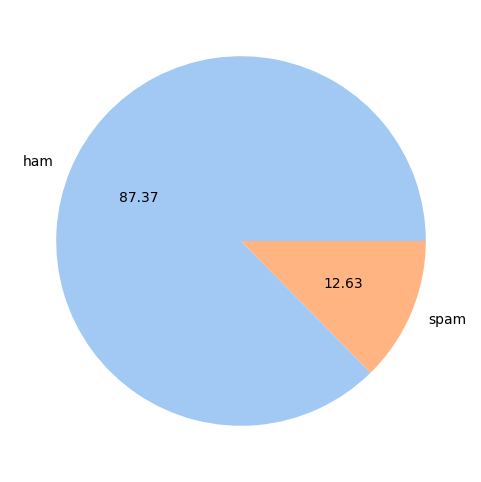

In [16]:
plt.figure(figsize=(6,6))
plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct='%0.2f',colors=sns.color_palette("pastel"))
plt.show()

In [17]:
df['num_characters']=df.text.apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
df['num_words']=df.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df['num_sentences']=df.text.apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
#ham describe
df[df['target']==0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [23]:
#Spam describe
df[df['target']==1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

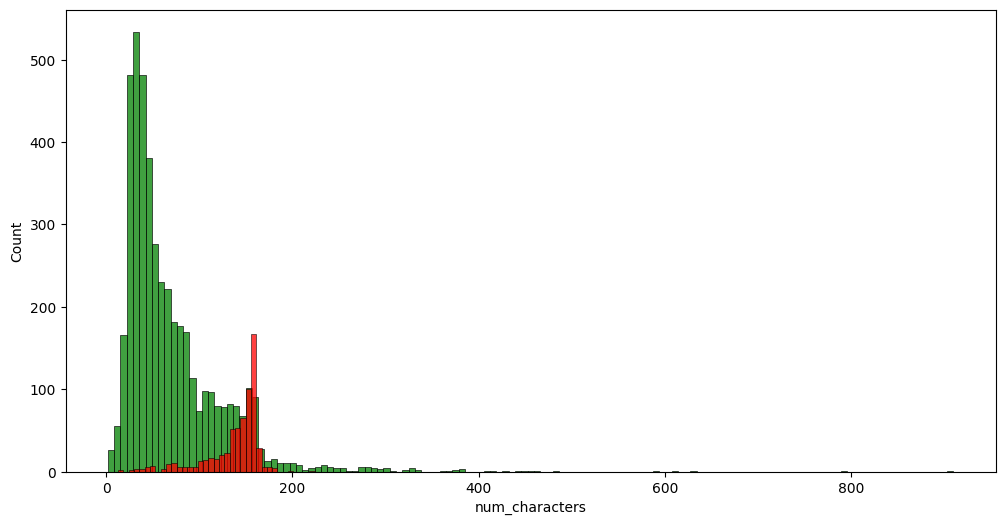

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0].num_characters,color='green')
sns.histplot(df[df['target']==1].num_characters, color='red')

<Axes: xlabel='num_words', ylabel='Count'>

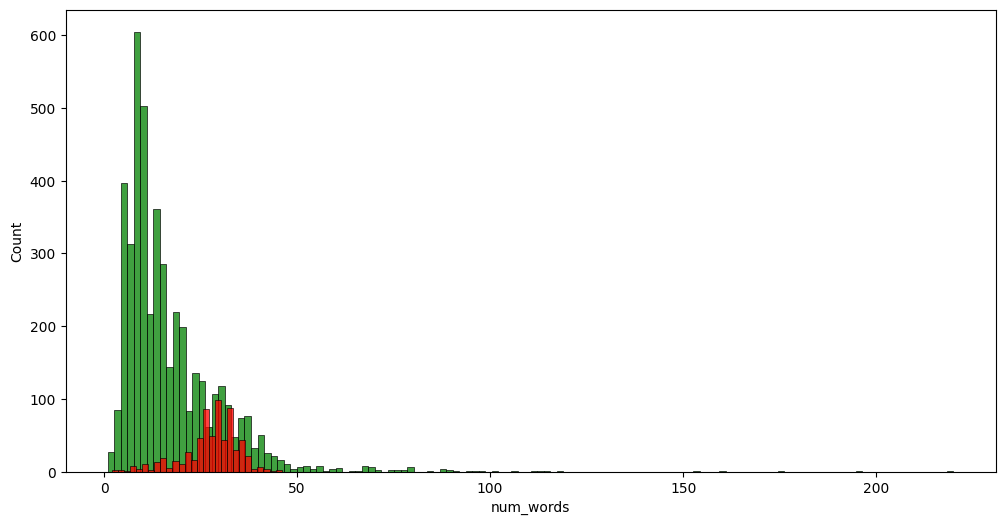

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0].num_words,color='green')
sns.histplot(df[df['target']==1].num_words, color='red')

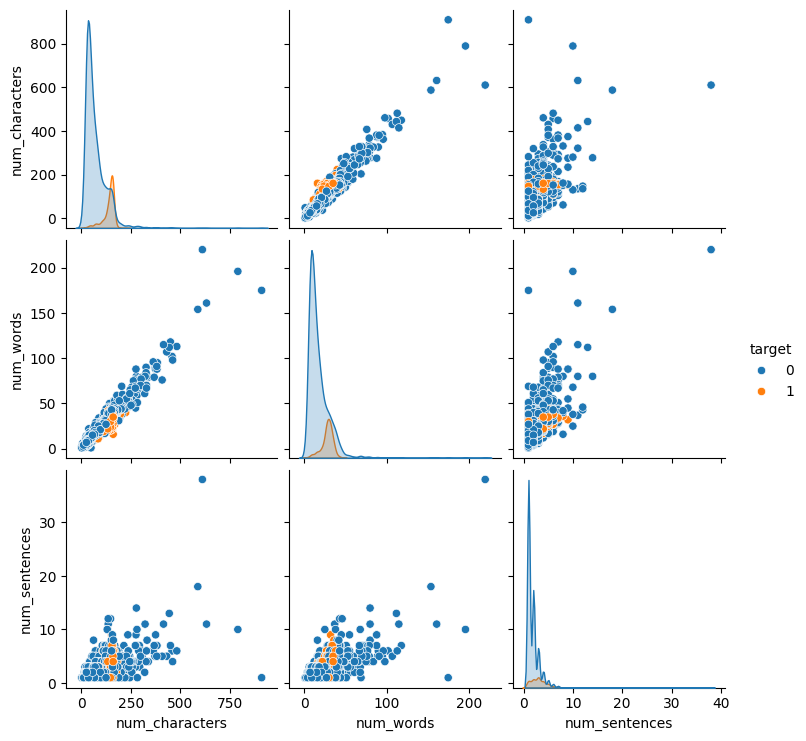

In [26]:
sns.pairplot(df,hue='target')

<Axes: >

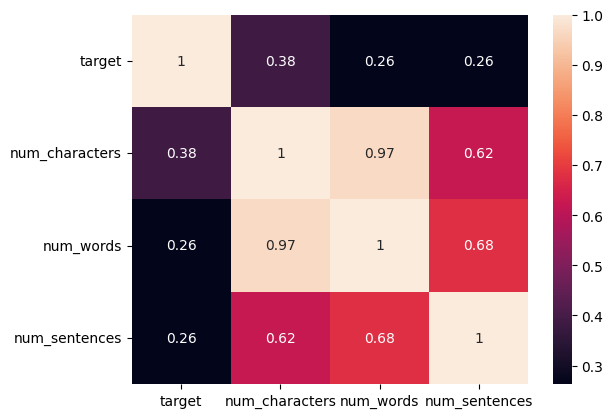

In [27]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

Data Preprocessing



*   Lower Case
*   Tokenization
*   Removing Special Characters
*   Removing Stop words and Punctuation
*   Stemming





In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y.copy()
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(ps.stem(i))

  return " ".join(y)

In [30]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [31]:
df['transformed_text']=df.text.apply(transform_text)

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500,min_font_size=10,background_color='white')

In [34]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

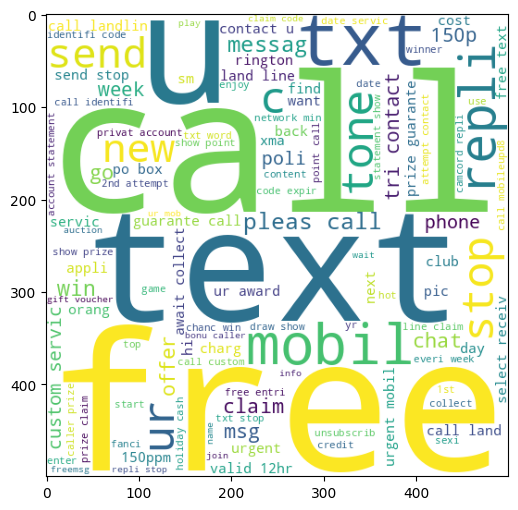

In [35]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [36]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

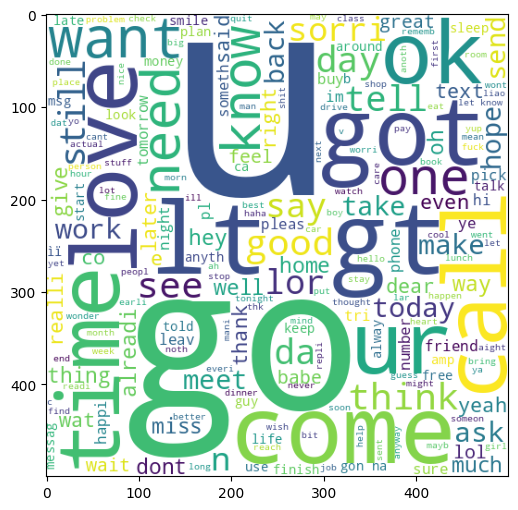

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [38]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
print(f"Total number of unique words in spam_corpus: {len(spam_corpus)}")

Total number of unique words in spam_corpus: 9939


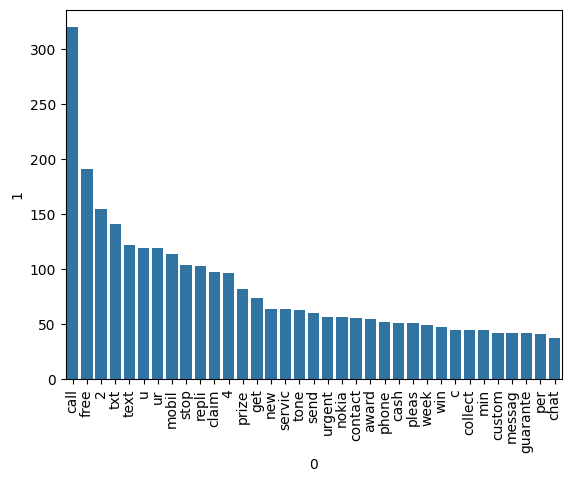

In [39]:
from collections import Counter
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(35))
# spam_corpus_df
sns.barplot(x=spam_corpus_df[0],y=spam_corpus_df[1])
# plt.figure(figsize=(5,8))
plt.xticks(rotation='vertical')
plt.show()

In [40]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
print(f"Total number of unique words in ham_corpus: {len(ham_corpus)}")

Total number of unique words in ham_corpus: 35404


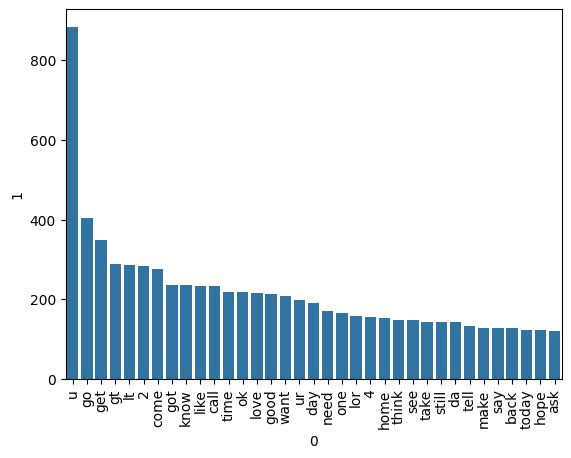

In [41]:
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(35))
sns.barplot(x=ham_corpus_df[0],y=ham_corpus_df[1])
# plt.figure(figsize=(5,8))
plt.xticks(rotation='vertical')
plt.show()

Model

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3500)

In [43]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [44]:
X.shape

(5169, 3500)

In [45]:
y = df['target'].values

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [48]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
rf= RandomForestClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel ='sigmoid', gamma=1)

In [49]:
clfs = {
    'MNB' : mnb,
    'GNB' : gnb,
    'BNB' : bnb,
    'rfc' : rf,
    'svc' : svc
}

In [50]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test,y_pred))
  precision_scores.append(precision_score(y_test,y_pred))
  print(f"Accuracy score of {name}: {accuracy_score(y_test,y_pred)}")
  print(f"Precision score of {name}: {precision_score(y_test,y_pred)}")


Accuracy score of MNB: 0.9700193423597679
Precision score of MNB: 1.0
Accuracy score of GNB: 0.8762088974854932
Precision score of GNB: 0.5231481481481481
Accuracy score of BNB: 0.9816247582205029
Precision score of BNB: 0.9917355371900827
Accuracy score of rfc: 0.971953578336557
Precision score of rfc: 0.990990990990991
Accuracy score of svc: 0.9758220502901354
Precision score of svc: 0.9747899159663865


Performing SMOTE

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [53]:
X_train_resampled.shape

(7240, 3500)

In [54]:
accuracy_scores_resampled = []
precision_scores_resampled = []
for name,clf in clfs.items():
  clf.fit(X_train_resampled,y_train_resampled)
  y_pred=clf.predict(X_test)
  accuracy_scores_resampled.append(accuracy_score(y_test,y_pred))
  precision_scores_resampled.append(precision_score(y_test,y_pred))
  print(f"Accuracy score of {name}: {accuracy_score(y_test,y_pred)}")
  print(f"Precision score of {name}: {precision_score(y_test,y_pred)}")

Accuracy score of MNB: 0.965183752417795
Precision score of MNB: 0.8445945945945946
Accuracy score of GNB: 0.8800773694390716
Precision score of GNB: 0.5330188679245284
Accuracy score of BNB: 0.9845261121856866
Precision score of BNB: 1.0
Accuracy score of rfc: 0.97678916827853
Precision score of rfc: 0.9913793103448276
Accuracy score of svc: 0.9777562862669246
Precision score of svc: 0.9259259259259259


In [55]:
performace_df = pd.DataFrame({'Algorithm':clfs.keys(),'accuracy': accuracy_scores, 'precision':precision_scores,'accuracy_resampled':accuracy_scores_resampled, 'precision_resampled':precision_scores_resampled})

In [56]:
performace_df

,Algorithm,accuracy,precision,accuracy_resampled,precision_resampled
0,MNB,0.970019,1.000000,0.965184,0.844595
1,GNB,0.876209,0.523148,0.880077,0.533019
2,BNB,0.981625,0.991736,0.984526,1.000000
3,rfc,0.971954,0.990991,0.976789,0.991379
4,svc,0.975822,0.974790,0.977756,0.925926


BNB has performed best here so we will continue with it.

In [58]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))
pickle.dump(transform_text,open('transform.pkl','wb'))